# Project on CNN - Computer Vision

## Part 4

## TASK: Company’s management requires an automation which can create a classifier capable of determining a flower’s species from a photo

In [1]:
# Importing necessary libraries

import seaborn as sns
import tensorflow
import random
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

### 1. Import the data. Analyse the dimensions of the data. Visualise the data

In [2]:
project_path = r'C:\Users\DELL\OneDrive\Documents\Gurukripa\Learning\AIML\AIML\Projects\NeuralNetworks\CNN\Flowers - Classification\17flowers- train\jpg'

In [3]:
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128


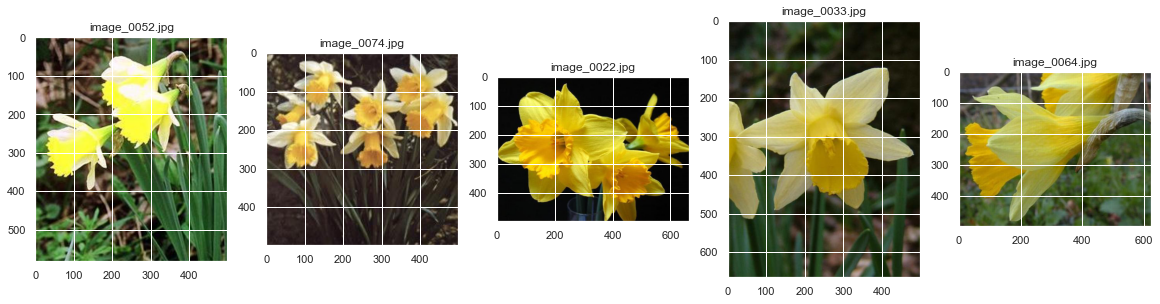

In [8]:
 ## Checking some sample images
plt.figure(figsize=(20,20))
test_folder=r'C:\Users\p0s041d\Documents\Program\Learning\AIML\AIML\AIML\Projects\NeuralNetworks\CNN\Flowers - Classification\17flowers- train\jpg\0'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=plt.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

 - As checked from the data provided, there are 17 categories of flowers present with 80 images for each category
 - Each comprise of size ~ 500 x ~ 600 pixels

### 2. Preprocess the data.

In [9]:
Class_0  = os.listdir('./Flowers - Classification/17flowers- train/jpg/0') # Reading image names and storing them in respective category list 

In [10]:
Class_1  = os.listdir('./Flowers - Classification/17flowers- train/jpg/1') # Reading image names and storing them in respective category list

In [11]:
Class_2  = os.listdir('./Flowers - Classification/17flowers- train/jpg/2') # Reading image names and storing them in respective category list

In [12]:
Class_3  = os.listdir('./Flowers - Classification/17flowers- train/jpg/3')

In [13]:
Class_4  = os.listdir('./Flowers - Classification/17flowers- train/jpg/4')

In [14]:
Class_5  = os.listdir('./Flowers - Classification/17flowers- train/jpg/5')

In [15]:
Class_6  = os.listdir('./Flowers - Classification/17flowers- train/jpg/6')

In [16]:
Class_7  = os.listdir('./Flowers - Classification/17flowers- train/jpg/7')

In [17]:
Class_8  = os.listdir('./Flowers - Classification/17flowers- train/jpg/8')

In [18]:
Class_9  = os.listdir('./Flowers - Classification/17flowers- train/jpg/9')

In [19]:
Class_10  = os.listdir('./Flowers - Classification/17flowers- train/jpg/10')

In [20]:
Class_11  = os.listdir('./Flowers - Classification/17flowers- train/jpg/11')

In [21]:
Class_12  = os.listdir('./Flowers - Classification/17flowers- train/jpg/12')

In [22]:
Class_13  = os.listdir('./Flowers - Classification/17flowers- train/jpg/13')

In [23]:
Class_14  = os.listdir('./Flowers - Classification/17flowers- train/jpg/14')

In [24]:
Class_15  = os.listdir('./Flowers - Classification/17flowers- train/jpg/15')

In [25]:
Class_16  = os.listdir('./Flowers - Classification/17flowers- train/jpg/16')

In [26]:
#Converting the lists created above into data frames
Class_0 = pd.DataFrame(Class_0)
Class_1= pd.DataFrame(Class_1)
Class_2= pd.DataFrame(Class_2)
Class_3= pd.DataFrame(Class_3)
Class_4= pd.DataFrame(Class_4)
Class_5= pd.DataFrame(Class_5)
Class_6= pd.DataFrame(Class_6)
Class_7= pd.DataFrame(Class_7)
Class_8= pd.DataFrame(Class_8)
Class_9= pd.DataFrame(Class_9)
Class_10= pd.DataFrame(Class_10)
Class_11= pd.DataFrame(Class_11)
Class_12= pd.DataFrame(Class_12)
Class_13= pd.DataFrame(Class_13)
Class_14= pd.DataFrame(Class_14)
Class_15= pd.DataFrame(Class_15)
Class_16= pd.DataFrame(Class_16)

In [27]:
#Creating a column in each dataframe storing the category name
Class_0['label']= 'Class_0'
Class_1['label']= 'Class_1'
Class_2['label']= 'Class_2'
Class_3['label']= 'Class_3'
Class_4['label']= 'Class_4'
Class_5['label']='Class_5'
Class_6['label']= 'Class_6'
Class_7['label']= 'Class_7'
Class_8['label']= 'Class_8'
Class_9['label']= 'Class_9'
Class_10['label']= 'Class_10'
Class_11['label']= 'Class_11'
Class_12['label']= 'Class_12'
Class_13['label']= 'Class_13'
Class_14['label']= 'Class_14'
Class_15['label']= 'Class_15'
Class_16['label']= 'Class_16'

In [28]:
#Concatenating each data frame and storing all data into a single data frame
labels = pd.concat([Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10,Class_11,Class_12,Class_13,Class_14,Class_15,Class_16])

In [29]:
labels.columns =['id', 'label'] # Adding one more column called image ID

In [30]:
labels['id'] = labels['id'].str.replace(r'.jpg$', '') # removing the ".jpg" extension from image name

In [31]:
labels.head() # checking top 5 entries

,id,label
0,image_0001,Class_0
1,image_0002,Class_0
2,image_0003,Class_0
3,image_0004,Class_0
4,image_0005,Class_0


In [32]:
# Checkiing count of images in each class
label_count = labels['label'].value_counts()
label_count

Class_7     80
Class_8     80
Class_15    80
Class_10    80
Class_13    80
Class_16    80
Class_5     80
Class_14    80
Class_0     80
Class_6     80
Class_4     80
Class_11    80
Class_2     80
Class_12    80
Class_1     80
Class_3     80
Class_9     80
Name: label, dtype: int64

In [33]:
Class_0.head()

,0,label
0,image_0001.jpg,Class_0
1,image_0002.jpg,Class_0
2,image_0003.jpg,Class_0
3,image_0004.jpg,Class_0
4,image_0005.jpg,Class_0


#### One-hot encodings of labels

Import numpy and encode labels['class'] column

In [34]:
import numpy as np
targets = pd.Series(labels['label'])
one_hot = pd.get_dummies(targets, sparse = True)
one_hot_labels = np.asarray(one_hot)

In [35]:
one_hot.iloc[1356:1359,:]

,Class_0,Class_1,Class_10,Class_11,Class_12,Class_13,Class_14,Class_15,Class_16,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
76,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [36]:
one_hot_labels[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [37]:
one_hot_labels[1359]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

We can see that the one hot labels have **not been defined in the ascending order** hence **while prediction of image at the final stage, we need to interpret accordingly**   

Creating a dataframe for interpretation of labels and classes 

In [38]:
interpret = pd.DataFrame({'Class':['Class_0', 'Class_1', 'Class_10', 'Class_11', 'Class_12', 'Class_13', 'Class_14', 'Class_15', 'Class_16', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9'],
        'One hot label position':[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16]})

In [39]:
interpret.head()

,Class,One hot label position
0,Class_0,0
1,Class_1,1
2,Class_10,2
3,Class_11,3
4,Class_12,4


**Hence, if the one hot label position of predicted image is 3, the image will belong to Class_11**

In case, one hot label is 3, we can return the corresponding Class value by passing the one hot label as below:

In [40]:
interpret.loc[interpret['One hot label position'] == 3, 'Class'].iloc[0]

'Class_11'

In [41]:
y = one_hot_labels

#### Define img_rows, img_cols, and num_channel variables

In [42]:
img_rows=128
img_cols=128
num_channel=3

#### Get features

In [43]:
from tqdm import tqdm
import cv2
x_feature = []
y_feature = []

i = 0 # initialisation
for f, img in tqdm(labels.values): # f for format ,jpg
    try:
        train_img = cv2.imread('./Flowers - Classification/17flowers- train/17flowers/jpg/{}.jpg'.format(f),0)
        label = one_hot_labels[i]
        train_img_resize = cv2.resize(train_img, (img_rows, img_cols)) 
        x_feature.append(train_img_resize)
        y_feature.append(label)
        i += 1
    except Exception as e:
        print(str(e))

100%|██████████████████████████████████████████████████████████████████████████████| 1360/1360 [00:18<00:00, 71.84it/s]


#### Normalize values

In [44]:
x_train_data = np.array(x_feature, np.float32) / 255.   # /= 255 for normolisation
print (x_train_data.shape)
x_train_data = np.expand_dims(x_train_data, axis = 3) # for keras to given input to Conv2D layer
print (x_train_data.shape)

(1360, 128, 128)
(1360, 128, 128, 1)


In [45]:
x_train_data

array([[[[0.9411765 ],
         [0.90588236],
         [0.9490196 ],
         ...,
         [0.09411765],
         [0.09803922],
         [0.21176471]],

        [[0.85490197],
         [0.80784315],
         [0.8862745 ],
         ...,
         [0.10980392],
         [0.07450981],
         [0.24313726]],

        [[0.85882354],
         [0.70980394],
         [0.9098039 ],
         ...,
         [0.10196079],
         [0.0627451 ],
         [0.28235295]],

        ...,

        [[0.5176471 ],
         [0.39215687],
         [0.20392157],
         ...,
         [0.17254902],
         [0.18039216],
         [0.1882353 ]],

        [[0.5019608 ],
         [0.4862745 ],
         [0.17254902],
         ...,
         [0.18039216],
         [0.18039216],
         [0.15294118]],

        [[0.4627451 ],
         [0.47058824],
         [0.14509805],
         ...,
         [0.15686275],
         [0.17254902],
         [0.14509805]]],


       [[[0.21960784],
         [0.27450982],
         [0.23

In [46]:
y_train_data = np.array(y_feature)
y_train_data.shape

(1360, 17)

#### Split the training and validation data here

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=2)
print (x_train.shape)
print (x_val.shape)

(1088, 128, 128, 1)
(272, 128, 128, 1)


In [48]:
x_train = np.array(x_train)

In [49]:
x_train

array([[[[0.01176471],
         [0.01176471],
         [0.01176471],
         ...,
         [0.0627451 ],
         [0.07450981],
         [0.09019608]],

        [[0.01176471],
         [0.01176471],
         [0.01176471],
         ...,
         [0.06666667],
         [0.07843138],
         [0.10196079]],

        [[0.01176471],
         [0.01176471],
         [0.01176471],
         ...,
         [0.06666667],
         [0.08235294],
         [0.09411765]],

        ...,

        [[0.13725491],
         [0.14509805],
         [0.22352941],
         ...,
         [0.09411765],
         [0.09803922],
         [0.09019608]],

        [[0.12941177],
         [0.14509805],
         [0.14117648],
         ...,
         [0.07843138],
         [0.08627451],
         [0.08627451]],

        [[0.1764706 ],
         [0.22745098],
         [0.13333334],
         ...,
         [0.09019608],
         [0.08235294],
         [0.09019608]]],


       [[[0.49803922],
         [0.25882354],
         [0.21

### 3. Data Visualization

#### Display the images and labels

Label: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


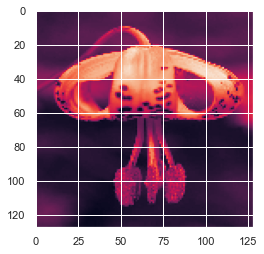

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[200]))
plt.imshow(x_train[200])

Label: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


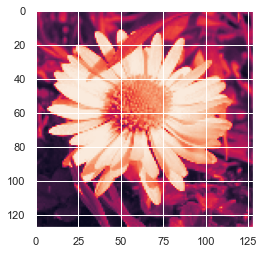

In [51]:
%matplotlib inline
print("Label: {}".format(y_train[100]))
plt.imshow(x_train[100])

Label: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


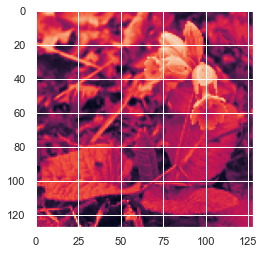

In [52]:
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(x_train[1000])

#### Apply different filters [ for example: blur, contour, edge detection, emboss, smooth etc.] on the images and display the image.

**Import utilities needed for convolution**

In [53]:
from scipy.signal import convolve2d

#### Blur the image

In [54]:
# Creating 5X5 Guassian Blur kernel with sigma = 1.0 and convolve the above image with that kernel

import numpy as np
kernel = np.array([[0.003765,0.015019,0.023792,0.015019,0.003765],
                   [0.015019,0.059912,0.094907,0.059912,0.015019],
                   [0.023792,0.094907,0.150342,0.094907,0.023792],
                   [0.015019,0.059912,0.094907,0.059912,0.015019],
                   [0.003765,0.015019,0.023792,0.015019,0.003765]])

**Convole the guassian kernel with the image and use 'valid' convolution and show the result side by side**

In [55]:
image = cv2.imread('./Flowers - Classification/17flowers- train/17flowers/jpg/image_1000.jpg'.format(f),0)

In [56]:
image

array([[45, 41, 37, ..., 72, 71, 71],
       [44, 40, 36, ..., 72, 73, 73],
       [42, 39, 36, ..., 74, 76, 76],
       ...,
       [18, 16, 17, ..., 22, 20, 20],
       [16, 15, 16, ..., 21, 19, 19],
       [15, 14, 15, ..., 19, 18, 18]], dtype=uint8)

Blurred Image


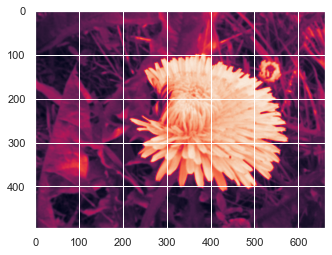

Original Image


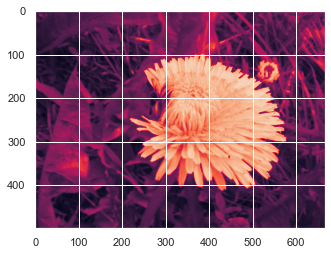

In [49]:
blurred_image = convolve2d(image, kernel, mode = 'valid')
print("Blurred Image")
plt.imshow(blurred_image)
plt.show()
print("Original Image")
plt.imshow(image)

#### Detect the edge of image

In [50]:
kernel_edge_detect1 = np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]])

Edge of the Image


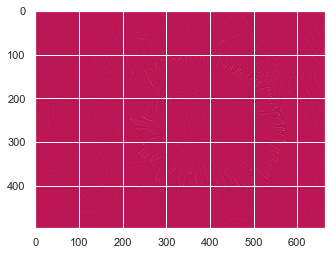

Original Image


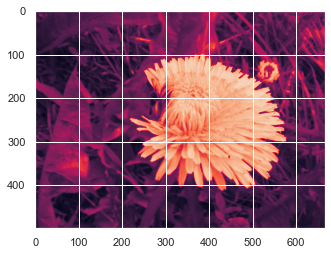

In [51]:
edge_image = convolve2d(image, kernel_edge_detect1, mode = 'valid')
print("Edge of the Image")
plt.imshow(edge_image)
plt.show()
print("Original Image")
plt.imshow(image)

#### Sharpen the image 

In [52]:
sharpen_image_kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

Sharpenned] Image


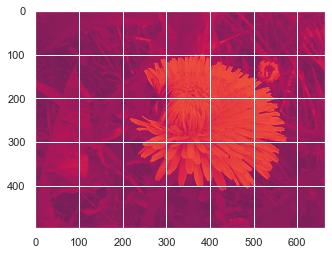

Original Image


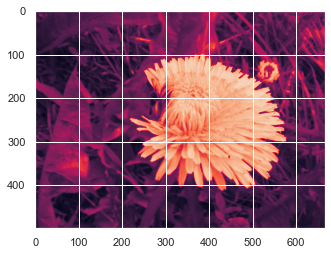

In [53]:
sharpen_image = convolve2d(image, sharpen_image_kernel, mode = 'valid')
print("Sharpenned] Image")
plt.imshow(sharpen_image)
plt.show()
print("Original Image")
plt.imshow(image)

## 4.Train tune and test AIML image classifier model

### Use supervised learning algorithms for training

In [54]:
from sklearn.model_selection import train_test_split
x_train_SL, x_val_SL, y_train_SL, y_val_SL = train_test_split(x_train_data, labels['label'], test_size=0.2, random_state=2)
print (x_train_SL.shape)
print (x_val_SL.shape)

(1088, 128, 128, 1)
(272, 128, 128, 1)


#### Flattening the training dataset

In [55]:
train_X = x_train_SL.reshape(x_train_SL.shape[0],128,128,1)
x_train_SL_final = []
for i in range(1088):
    x_train_SL_final.append(train_X[i,:].flatten())

In [56]:
x_train_SL

array([[[[0.01176471],
         [0.01176471],
         [0.01176471],
         ...,
         [0.0627451 ],
         [0.07450981],
         [0.09019608]],

        [[0.01176471],
         [0.01176471],
         [0.01176471],
         ...,
         [0.06666667],
         [0.07843138],
         [0.10196079]],

        [[0.01176471],
         [0.01176471],
         [0.01176471],
         ...,
         [0.06666667],
         [0.08235294],
         [0.09411765]],

        ...,

        [[0.13725491],
         [0.14509805],
         [0.22352941],
         ...,
         [0.09411765],
         [0.09803922],
         [0.09019608]],

        [[0.12941177],
         [0.14509805],
         [0.14117648],
         ...,
         [0.07843138],
         [0.08627451],
         [0.08627451]],

        [[0.1764706 ],
         [0.22745098],
         [0.13333334],
         ...,
         [0.09019608],
         [0.08235294],
         [0.09019608]]],


       [[[0.49803922],
         [0.25882354],
         [0.21

In [57]:
pd.DataFrame(x_train_SL_final).shape

(1088, 16384)

In [58]:
y_train_SL.shape

(1088,)

In [59]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3)  

In [60]:
#labels.label

In [61]:
labels.label.iloc[:2]

0    Class_0
1    Class_0
Name: label, dtype: object

In [62]:
clf.fit(x_train_SL_final , y_train_SL)

SVC(C=3, gamma=0.025)

#### Flattening the validation dataset

In [63]:
val_x = x_val_SL.reshape(x_val_SL.shape[0],128,128,1)
x_val_SL_final = []
for i in range(272):
    x_val_SL_final.append(x_val_SL[i,:].flatten())

In [64]:
y_pred_SL = clf.predict(x_val_SL_final)

In [65]:
y_pred_SL = pd.DataFrame(y_pred_SL)

In [66]:
y_pred_SL.columns =['label']

In [67]:
pd.DataFrame(y_val_SL).head()

,label
66,Class_16
79,Class_11
71,Class_0
28,Class_3
58,Class_13


In [68]:
y_pred_SL.head()

,label
0,Class_15
1,Class_15
2,Class_15
3,Class_15
4,Class_15


In [69]:
y_val_SL=pd.DataFrame(y_val_SL)

In [70]:
y_val_SL.head()

,label
66,Class_16
79,Class_11
71,Class_0
28,Class_3
58,Class_13


In [71]:
y_pred_SL.shape

(272, 1)

In [72]:
y_val_SL.shape

(272, 1)

In [73]:
# Defining a function to find accuracy of the classifier
def getAccuracy(testSet, predictions):
 correct = 0
 for x in range(len(testSet)):
    if testSet[x]== predictions[x]:
        correct += 1
 return (correct/float(len(testSet))) * 100.0

In [74]:
y_pred_SL.to_numpy()[1]

array(['Class_15'], dtype=object)

In [75]:
getAccuracy(y_val_SL.to_numpy() ,y_pred_SL.to_numpy()) 

9.558823529411764

#### Conclusion: The percentage accuracy of the classification done through suprevised ML technique is found 9.56% 

### Using Neural Network for training the model

### Import the required layers and model

In [76]:
from tensorflow.keras.models import Sequential  # initial NN
from tensorflow.keras.layers import Dense, Dropout # construct each layer
from tensorflow.keras.layers import Conv2D # swipe across the image by 1
from tensorflow.keras.layers import MaxPooling2D # swipe across by pool size
from tensorflow.keras.layers import Flatten, GlobalAveragePooling2D

In [77]:
model_NN = Sequential() # Initializing the model
model_NN.add(Flatten()) # Flatten input data
model_NN.add(Dense(1, activation="relu")) # Add dense layer with 11 inputs/ parameters
model_NN.add(Dense(17, activation="softmax")) # Add output layer with 17 classes of outputs

In [78]:
# Compile the model
model_NN.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model_NN.fit(x=x_train, y=y_train, batch_size=32, epochs=400, validation_data=(x_val, y_val))

Epoch 1/400
34/34 [==============================] - 2s 30ms/step - loss: 2.8346 - accuracy: 0.0478 - val_loss: 2.8334 - val_accuracy: 0.0404
Epoch 2/400
34/34 [==============================] - 0s 6ms/step - loss: 2.8333 - accuracy: 0.0478 - val_loss: 2.8336 - val_accuracy: 0.0404
Epoch 3/400
34/34 [==============================] - 0s 7ms/step - loss: 2.8332 - accuracy: 0.0597 - val_loss: 2.8339 - val_accuracy: 0.0404
Epoch 4/400
34/34 [==============================] - 0s 7ms/step - loss: 2.8332 - accuracy: 0.0506 - val_loss: 2.8341 - val_accuracy: 0.0404
Epoch 5/400
34/34 [==============================] - 0s 7ms/step - loss: 2.8331 - accuracy: 0.0634 - val_loss: 2.8343 - val_accuracy: 0.0404
Epoch 6/400
34/34 [==============================] - 0s 7ms/step - loss: 2.8331 - accuracy: 0.0634 - val_loss: 2.8345 - val_accuracy: 0.0404
Epoch 7/400
34/34 [==============================] - 0s 6ms/step - loss: 2.8330 - accuracy: 0.0634 - val_loss: 2.8347 - val_accuracy: 0.0404
Epoch 8/400


Epoch 116/400
34/34 [==============================] - 0s 8ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8447 - val_accuracy: 0.0404
Epoch 117/400
34/34 [==============================] - 0s 7ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8447 - val_accuracy: 0.0404
Epoch 118/400
34/34 [==============================] - 0s 7ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8447 - val_accuracy: 0.0404
Epoch 119/400
34/34 [==============================] - 0s 7ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8448 - val_accuracy: 0.0404
Epoch 120/400
34/34 [==============================] - 0s 8ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8448 - val_accuracy: 0.0404
Epoch 121/400
34/34 [==============================] - 0s 6ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8448 - val_accuracy: 0.0404
Epoch 122/400
34/34 [==============================] - 0s 6ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8449 - val_accuracy: 0.0404

34/34 [==============================] - 0s 7ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8461 - val_accuracy: 0.0404
Epoch 231/400
34/34 [==============================] - 0s 7ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8461 - val_accuracy: 0.0404
Epoch 232/400
34/34 [==============================] - 0s 15ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8461 - val_accuracy: 0.0404
Epoch 233/400
34/34 [==============================] - 0s 7ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8461 - val_accuracy: 0.0404
Epoch 234/400
34/34 [==============================] - 0s 6ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8461 - val_accuracy: 0.0404
Epoch 235/400
34/34 [==============================] - 1s 16ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8461 - val_accuracy: 0.0404
Epoch 236/400
34/34 [==============================] - 0s 6ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8461 - val_accuracy: 0.0404
Epoch 237/4

34/34 [==============================] - 0s 5ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8463 - val_accuracy: 0.0404
Epoch 345/400
34/34 [==============================] - 0s 5ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8463 - val_accuracy: 0.0404
Epoch 346/400
34/34 [==============================] - 0s 6ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8463 - val_accuracy: 0.0404
Epoch 347/400
34/34 [==============================] - 0s 6ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8463 - val_accuracy: 0.0404
Epoch 348/400
34/34 [==============================] - 0s 6ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8463 - val_accuracy: 0.0404
Epoch 349/400
34/34 [==============================] - 0s 6ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8463 - val_accuracy: 0.0404
Epoch 350/400
34/34 [==============================] - 0s 7ms/step - loss: 2.8319 - accuracy: 0.0634 - val_loss: 2.8463 - val_accuracy: 0.0404
Epoch 351/400

In [79]:
model_NN.evaluate(x_val, y_val) # Checking the accuracy with test data

9/9 [==============================] - 0s 5ms/step - loss: 2.8463 - accuracy: 0.0404


[2.846261501312256, 0.040441177785396576]

#### Conclusion: The percentage accuracy of the classification done through Neural Network technique is found 5.88%

### Using CNN for training the model

### Define model and add layers

In [80]:
img_cols

128

In [81]:
num_channel

3

In [82]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation ='relu', input_shape = (img_rows, img_cols, 1))) 
model.add(MaxPooling2D(pool_size=3))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=4, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.8))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.8))

model.add(Flatten()) 
# fully connected layer 
model.add(Dense(units = 500, activation = 'relu')) 
model.add(Dropout(0.8))
# output layer
model.add(Dense(units = 17, activation = 'softmax')) 

### Compile and summarize the model

In [83]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=0.01)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"]) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 128)        

### Define hyperparametrs and fit the model

In [84]:
x_train.shape

(1088, 128, 128, 1)

In [85]:
y_train.shape

(1088, 17)

In [86]:
batch_size = 128
nb_epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epochs, 
                    validation_data=(x_val, y_val),
                    initial_epoch=0)

Epoch 1/20
9/9 [==============================] - 33s 3s/step - loss: 3.0540 - accuracy: 0.0597 - val_loss: 2.8348 - val_accuracy: 0.0515
Epoch 2/20
9/9 [==============================] - 31s 3s/step - loss: 2.8401 - accuracy: 0.0432 - val_loss: 2.8372 - val_accuracy: 0.0551
Epoch 3/20
9/9 [==============================] - 28s 3s/step - loss: 2.8398 - accuracy: 0.0506 - val_loss: 2.8403 - val_accuracy: 0.0588
Epoch 4/20
9/9 [==============================] - 27s 3s/step - loss: 2.8362 - accuracy: 0.0533 - val_loss: 2.8433 - val_accuracy: 0.0404
Epoch 5/20
9/9 [==============================] - 26s 3s/step - loss: 2.8354 - accuracy: 0.0625 - val_loss: 2.8448 - val_accuracy: 0.0478
Epoch 6/20
9/9 [==============================] - 28s 3s/step - loss: 2.8341 - accuracy: 0.0653 - val_loss: 2.8456 - val_accuracy: 0.0404
Epoch 7/20
9/9 [==============================] - 28s 3s/step - loss: 2.8315 - accuracy: 0.0680 - val_loss: 2.8472 - val_accuracy: 0.0404
Epoch 8/20
9/9 [==================

#### Conclusion: The percentage accuracy of the classification done through CNN technique is found as below:
- For Training dataset: 7.35%
- For Testing dataset: 5.88%

## Using Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

In [87]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'\\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

### Get Image embedding from the pre-trained model and use that as input to present model

In [88]:
from tensorflow.keras.preprocessing import image

X_arr = []
# X_arr = base_model.predict(preprocess_input(img_to_array(image.load_img('./train/'+labels['id'][0]+'.jpg', target_size=[128,128]))))

for id, label in tqdm(labels.values):
    X_arr.append(base_model.predict(preprocess_input(np.expand_dims(image.img_to_array(image.load_img('./Flowers - Classification/17flowers- train/17flowers/jpg/'+id+'.jpg', target_size=[128,128])), axis=0)))[0])
X = pd.DataFrame(X_arr)

100%|██████████████████████████████████████████████████████████████████████████████| 1360/1360 [06:24<00:00,  3.54it/s]


In [89]:
from tensorflow.keras.layers import Activation
model = Sequential([
    Dense(1024, input_shape=(512,)),
    Activation('relu'),
    Dense(256, input_shape=(512,)),
    Activation('relu'),
    Dense(17),
    Activation('softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
X_train = X
y_train = y_feature

In [91]:
model.fit(X_train, np.asarray(y_train), epochs=100, batch_size=100, verbose=True)

Epoch 1/100
14/14 [==============================] - 1s 15ms/step - loss: 4.9672 - accuracy: 0.4375
Epoch 2/100
14/14 [==============================] - 0s 17ms/step - loss: 0.9899 - accuracy: 0.7978
Epoch 3/100
14/14 [==============================] - 0s 15ms/step - loss: 0.3565 - accuracy: 0.9015
Epoch 4/100
14/14 [==============================] - 0s 13ms/step - loss: 0.1783 - accuracy: 0.9559
Epoch 5/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0890 - accuracy: 0.9809
Epoch 6/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0488 - accuracy: 0.9926
Epoch 7/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0295 - accuracy: 0.9993
Epoch 8/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0205 - accuracy: 1.0000
Epoch 9/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 10/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0118 - accuracy: 1.0000

14/14 [==============================] - 0s 16ms/step - loss: 1.4453e-04 - accuracy: 1.0000
Epoch 81/100
14/14 [==============================] - 0s 15ms/step - loss: 1.3899e-04 - accuracy: 1.0000
Epoch 82/100
14/14 [==============================] - 0s 13ms/step - loss: 1.3505e-04 - accuracy: 1.0000
Epoch 83/100
14/14 [==============================] - 0s 17ms/step - loss: 1.3135e-04 - accuracy: 1.0000
Epoch 84/100
14/14 [==============================] - 0s 14ms/step - loss: 1.2752e-04 - accuracy: 1.0000
Epoch 85/100
14/14 [==============================] - 0s 14ms/step - loss: 1.2444e-04 - accuracy: 1.0000
Epoch 86/100
14/14 [==============================] - 0s 15ms/step - loss: 1.2101e-04 - accuracy: 1.0000
Epoch 87/100
14/14 [==============================] - 0s 13ms/step - loss: 1.1780e-04 - accuracy: 1.0000
Epoch 88/100
14/14 [==============================] - 0s 13ms/step - loss: 1.1428e-04 - accuracy: 1.0000
Epoch 89/100
14/14 [==============================] - 0s 13ms/step -

#### Conclusion: The percentage accuracy of the classification through Transfer learning technique (VGGnet) is found as 100%

## Compare the results from the above step along with your detailed observations.

We built the image classifier models using 4 techniques:
- **Supervised Learning**
- **Neural Network**
- **CNN**
- **CNN with Transfer Learning**

Below are the observations:
- **Supervised Learning**: Accuracy of 9.56% with gamma= 0.025 and C= 3 
- **Neural Network**: Accuracy of 6.62% (with train data) and 5.88% (with validation data), with 1 input node and 17 output nodes
- **CNN**: Accuracy of 7.35% (with train data) and 5.88% (with validation data)
- **CNN with Transfer Learning**: Accuracy of 100%, with VGG16 architecture used for transfer learning

#### Summary:
- We can see that the highest accuracy is observed with the classifier built from Transfer Learning method.
- The order in which we observed accuracies is:
    **Transfer Learning > Supervised Learning > CNN > Neural Network**

## Pickle the best performing model.

Saving model and architecture to single file

In [92]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


Reloading and evaluating a saved model

In [93]:
from numpy import loadtxt
from keras.models import load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# load model
model = load_model('model.h5') # loading the model
# summarize model.
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 17)                4369      
_________________________________________________________________
activation_2 (Activation)    (None, 17)                0         
Total params: 792,081
Trainable params: 792,081
Non-trainable params: 0
________________________________________________

## 5. Create a GUI to import the image “Prediction.jpg” and use the above designed AIML image classification model to predict the class/label of this image.

In [ ]:
# Import library

from tkinter import *
import re
import webbrowser
from tensorflow.keras.preprocessing import image
# App window
TKINTER_GUI = Tk()
TKINTER_GUI.title("AIML - Image Classifier - GUI")

# Recieve the input------------------------------------------------------------------------------------------------

# Static text for Welcome and Instructions

Welcome_text = Label(TKINTER_GUI, text="Flowers Image Classification Model using Neural Network", font=("Arial", 20))
Welcome_text.grid(column=1, row=0)  

Instruction_text = Label(TKINTER_GUI, text="Import the prediction image file to classify")
Instruction_text.grid(column=1, row=1)   


# def callback():
#     webbrowser.open_new('https://drive.google.com/uc?export=download&id=1xBhkz3o6NTj8kQfhwRRme6vaYLuJeCO_')

# # Button to download the input file template
# BUTTON_download_input_template = Button(TKINTER_GUI, text="Download Input file template", command=callback)
# BUTTON_download_input_template.grid(column=1, row=2) 


# Static text related to importing the input file
Input_static_text2 = Label(TKINTER_GUI, text="Step-1: Input file name:")
Input_static_text2.grid(column=0, row=5)  

# Import the Input file for training and testing the model
Input_file_name = StringVar()
Input_file_entrybox = Entry(TKINTER_GUI, width = 16, textvariable = Input_file_name)
Input_file_entrybox.grid(row=5, column =1)


def Import_data():
    global DB
    DF_Name = Input_file_name.get()
    #DB_extension = re.findall("\..*", DF_Name)
    #if DB_extension ==['.jpg']:
    #DB = cv2.imread(DF_Name,0)
    #cv2.resize(DB, (128, 128)).reshape(1,128,128,1)
    DB = pd.DataFrame(base_model.predict(preprocess_input(np.expand_dims(image.img_to_array(image.load_img('./'+DF_Name+'.jpg', target_size=[128,128])), axis=0))))
   # elif DB_extension ==['.png']:
      #  DB = pd.read_excel(DF_Name)
    # Blank emoty window to show confirmation
    confirm = "Done"
    Confirm_entrybox = Entry(TKINTER_GUI, width=16)
    Confirm_entrybox.grid(row=5, column=3)
    Confirm_entrybox.insert(1, str(confirm))


# Button to Import Input file for training and testing the model
BUTTON_Import_Input_Data = Button(TKINTER_GUI, text="Import Input Data", command=Import_data)
BUTTON_Import_Input_Data.grid(column=2, row=5) # 1 row, 3 col

#Static text related to getting predicted class of the flower
Input_static_text3 = Label(TKINTER_GUI, text="Class of the image is:")
Input_static_text3.grid(column=2, row=8)  

# Get the Target Column name 
# Target_column_name = StringVar()
# Target_column_entrybox = Entry(TKINTER_GUI, width = 16, textvariable = Target_column_name)
# Target_column_entrybox.grid(row=6, column =1)

# def Import_Target():
#     global Target_column, X_trainset, X_testset, y_trainset, y_testset, y_trainset_classifier, y_testset_classifier
#     Target_column = Target_column_name.get()
#     # Blank emoty window to show confirmation
#     confirm = "Done"
#     Confirm_entrybox = Entry(TKINTER_GUI, width=16)
#     Confirm_entrybox.grid(row=6, column=3)
#     Confirm_entrybox.insert(1, str(confirm))
#     # Splitting the data into train and test sets
#     X_trainset, X_testset, y_trainset, y_testset = train_test_split(DB.loc[:, DB.columns != Target_column], DB[Target_column], stratify=DB[Target_column], test_size = 0.3, random_state=11)
#     X_trainset = X_trainset.to_numpy()
#     y_trainset = y_trainset.to_numpy()
#     y_trainset_classifier = to_categorical(y_trainset)
#     y_testset_classifier = to_categorical(y_testset)

# Button to Import Target file name
# BUTTON_Import_Target_Column = Button(TKINTER_GUI, text="Import Target Column", command=Import_Target)
# BUTTON_Import_Target_Column.grid(column=2, row=6) # 1 row, 3 col


# # Static text related to rest functions   
#Input_static_text4 = Label(TKINTER_GUI, text="Step-3: Neural Network Regressor:")
#Input_static_text4.grid(column=0, row=7) 

# Input_static_text5 = Label(TKINTER_GUI, text="Regression")
# Input_static_text5.grid(column=0, row=8) 

# Input_static_text6 = Label(TKINTER_GUI, text="Pickle")
# Input_static_text6.grid(column=0, row=9) 

# Input_static_text7 = Label(TKINTER_GUI, text="Step-4: Neural Network Classifier:")
# Input_static_text7.grid(column=0, row=10) 

# Input_static_text5 = Label(TKINTER_GUI, text="Classifier")
# Input_static_text5.grid(column=0, row=11) 

# Input_static_text6 = Label(TKINTER_GUI, text="Pickle")
# Input_static_text6.grid(column=0, row=12) 

# Predict the outcome------------------------------------------------------------------------------------------------

# Run respective regressors and classifiers
      
def Predict():
    # Initialize Sequential model
#     model = tensorflow.keras.models.Sequential()
    
#     # Normalize input data
#     model.add(tensorflow.keras.layers.BatchNormalization(input_shape=(11,)))
    
#     # Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
#     model.add(tensorflow.keras.layers.Dense(1))
#     model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
#     history = model.fit(X_trainset, y_trainset, epochs=500, validation_split=0.35) 
#     model.save("model.h5")
    model = load_model('model.h5') # loading the model
    y_predicted_final = model.predict(DB)
    # Result window to show predicted value
    Result_entrybox_DT = Entry(TKINTER_GUI, width=16)
    Result_entrybox_DT.grid(row=8, column=3)
    #max_index = y_predicted_final.index(max(y_predicted_final))
    max_index = y_predicted_final.argmax()
    Result_entrybox_DT.insert(1,str(interpret.loc[interpret['One hot label position'] == max_index, 'Class'].iloc[0]))

# def Run_Pickle_Regressor():
#     # load mode
#     pickle_model = load_model('model.h5')
#     # Show model accuracy
#     y_pred_pickle = model.predict(X_testset)
#     score = r2_score(y_testset, y_pred_pickle)
#     # Result window to show predicted value
#     Result_entrybox_BC = Entry(TKINTER_GUI, width=16)
#     Result_entrybox_BC.grid(row=9, column=2)
#     Result_entrybox_BC.insert(1, "Accuracy: " +str(score*100))
    
# def Train_Classifier():

#     model2 = Sequential()
#     model2.add(Flatten())
#     model2.add(Dense(11, activation="relu"))
#     model2.add(Dense(9, activation="softmax"))
#     model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
#     model2.fit(x=X_trainset, y=y_trainset_classifier, batch_size=32, epochs=400, validation_data=(X_testset, y_testset_classifier))
#     model2.save("model2.h5")
#     # Result window to show predicted value
#     Result_entrybox_AB = Entry(TKINTER_GUI, width=16)
#     Result_entrybox_AB.grid(row=11, column=2)
#     Result_entrybox_AB.insert(1, str("Network Trained"))
    
# def Run_Pickle_Classifier():
#     # load mode
#     pickle_model2 = load_model('model2.h5')
#     # Show model accuracy
#     score = pickle_model2.evaluate(X_testset, y_testset_classifier, verbose=0)
#     # Result window to show predicted value
#     Result_entrybox_GB = Entry(TKINTER_GUI, width=16)
#     Result_entrybox_GB.grid(row=12, column=2)
#     Result_entrybox_GB.insert(1, "Accuracy: " +str(score[1]*100))
    


# Buttons to Run the chosen model for prediction

BUTTON_DT = Button(TKINTER_GUI, text="Predict", command=Predict)
BUTTON_DT.grid(column=1, row=8) # 0 row, 3 col

# BUTTON_BC = Button(TKINTER_GUI, text="Run Regressor", command=Run_Pickle_Regressor)
# BUTTON_BC.grid(column=1, row=9) # 0 row, 3 col

# BUTTON_AB = Button(TKINTER_GUI, text="Train Classifier", command=Train_Classifier)
# BUTTON_AB.grid(column=1, row=11) # 0 row, 3 col

# BUTTON_GB = Button(TKINTER_GUI, text="Run Classifier", command=Run_Pickle_Classifier)
# BUTTON_GB.grid(column=1, row=12) # 0 row, 3 col




# App closure
TKINTER_GUI.mainloop()

Below is the output of the GUI which suggests that the class of the image is **10**

![title](Project_2_GUI_output.png)

To verify the classifier we can visually compare few of the images from Class_10 and the prediction image

#### Prediction Image

![title](Flower_Prediction_Expected.jpg)

#### Few sample images from Class_10

![title](image_0802.jpg)

![title](image_0818.jpg)

![title](image_0834.jpg)

#### Conclusion: The prediction is accurate as we can visually see that the Class_10 sample images are same as that of prediction image